# Online Bayes Filtering

## Load Dependencies

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import IPython.display as ipd
from environment import *

## Load Maze 1

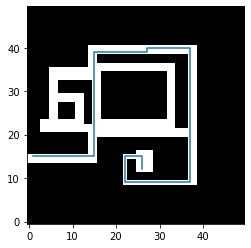

In [5]:
## Step 1: Create the world and devise robot motion
# Load in a particular environment
env = Environment("Maze1.png")
# Devise a path through that environment that passes through 3 locations
X = env.simulate_trajectory([[0, 15], [27, 40], [26, 12]])
# Plot the environment with the path superimposed
plt.figure()
env.plot()
plt.plot(X[:, 0], X[:, 1])
res = 50
# Get perfect scans
state_scans = env.get_state_scans(res)

## Load Maze 2

KeyboardInterrupt: 

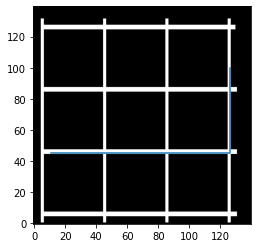

In [4]:
env = Environment("Maze2.png")
res = 50
X = env.simulate_trajectory([[10, 45], [120, 45], [126, 100]])
plt.figure()
env.plot()
plt.plot(X[:, 0], X[:, 1])

alpha = 4
np.random.seed(0)

# Get perfect scans
state_scans = env.get_state_scans(res)

## Load Maze 3

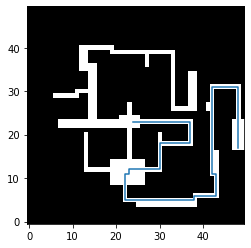

In [70]:
env = Environment("Maze3.png")
res = 50
X = env.simulate_trajectory([[23,23], [37, 20], [23, 11], [42,15], [48,17]])
plt.figure()
env.plot()
plt.plot(X[:, 0], X[:, 1])

alpha = 4
np.random.seed(0)

# Get perfect scans
state_scans = env.get_state_scans(res)

## Get measurement probability based on expected and observed scans

In [6]:
def get_measurement_prob(exp, obs, alpha, gamma=0.1):
    """
    exp: ndarray(N)
        Ground truth scan
    obs: ndarray(N)
        Measured scan
    alpha: float
        Disparity
    """
    prod = alpha*exp + gamma
    res = -np.sum(np.log(np.sqrt(2*np.pi)*prod)) 
    res -= np.sum((exp-obs)**2 / (2*(prod**2)))
    return np.exp(res)

## Process data online

RuntimeError: Requested MovieWriter (ffmpeg) not available

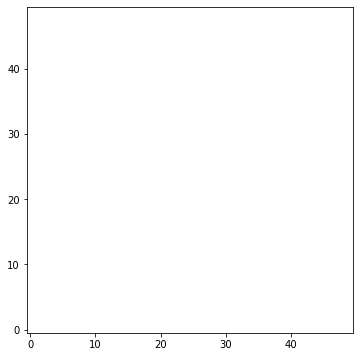

In [7]:
frames = [] # for storing the generated images
fig = plt.figure(figsize=(6, 6))
K = len(state_scans) # Number of states
T = X.shape[0] # Number of timesteps
alpha = 4
## TODO: Setup initial probabilities, etc
probs = np.ones(K)/K
for i in range(T): # Filter every measurement that comes in
    ## TODO: Bayes filtering for this frame index
    g = np.zeros(K)
    observed_scan = env.get_range_scan(X[i, :], res, alpha)
    for j in range(K):
        trans = 0
    
        for k in env.neighbors[j]:
            trans += probs[k]/len(env.neighbors[j])
            
        meas = get_measurement_prob(state_scans[j], observed_scan, alpha)
        g[j] = meas * trans

    probs = g/np.sum(g)
    probs = probs - np.min(probs)
    probs = probs/np.max(probs)
    plot = env.plot_probabilities(probs, p=1e-2)
    plot.append(plt.scatter([X[i, 0]], [X[i, 1]], c='C0'))
    frames.append(plot) 
ani = animation.ArtistAnimation(fig, frames, interval=200, blit=True, repeat_delay=1000)
ipd.HTML(ani.to_html5_video())